# 선형회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
np.random.seed(42)

## 1. 정규 방정식을 사용한 선형회귀

- y =3X + 4

In [2]:
X = 2 * np.random.rand(100, 1)
y = 3 * X + 4 + np.random.randn(100, 1)

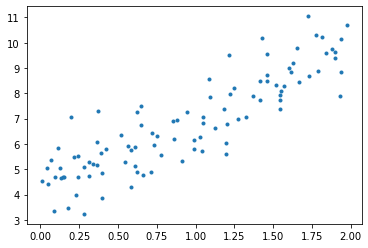

In [3]:
plt.plot(X, y, '.')

In [4]:
np.ones((100, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [5]:
X_b = np.c_[np.ones((100, 1)), X]

In [6]:
Image('./images/img1.png')

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

- 정규방정식 공식을 np.linalg 함수를 이용해서 해를 구함

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [9]:
# array([[4.21509616], # theta 0 : 절편
#        [2.77011339]]) # theta 1 : 기울기
# y = 3X + 4

- scikit-learn 제공 LinearRegression 사용

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

## 2. 경사 하강법을 사용한 선형회귀

**경사하강법**

In [13]:
Image('./images/img2.png')

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

**그레디언트**

In [14]:
Image('./images/img3.png')

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

- 배치 경사하강법

In [15]:
m = 100
theta = np.random.randn(2, 1)
eta = 0.1
n_iterations = 1000

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # gradients (theta1에 대한 미분, theta2에 대한 미분)
  theta = theta - eta*gradients # theta (theta 0, theta 1)

In [16]:
theta # y= 3X + 4

array([[4.21509616],
       [2.77011339]])

- 확률적 경사하강법

In [17]:
np.random.seed(42)

In [18]:
m = 100
theta = np.random.randn(2, 1)
n_epochs = 50 
t0, t1 = 5, 50
def learning_schedule(t):
  return t0/(t + t1)

for epoch in range(n_epochs): # epoch : 모든 데이터가 학습에 참여했을 때 1 epoch
  for i in range(m): # m: 100개 샘플수 (100개의 샘플중에 여러번 뽑히는 샘플도 있고, 전혀 선택되지 않는 샘플도 있음)
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # gradients (theta1에 대한 미분, theta2에 대한 미분)
    eta = learning_schedule(epoch*m+ i) # step수가 증감함에 따라 eta(학습률)이 작아지게 함
    theta = theta - eta*gradients # theta (theta 0, theta 1)

In [19]:
theta # y = 3X + 4

array([[4.21076011],
       [2.74856079]])

- scikit-learn 제공하는 SGDRegressor() 사용

In [20]:
from sklearn.linear_model import SGDRegressor

In [21]:
y.shape

(100, 1)

In [22]:
y.ravel().shape

(100,)

In [23]:
y.flatten().shape

(100,)

In [24]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_ # y= 3X + 4

(array([4.24365286]), array([2.8250878]))

In [26]:
# 선형회귀 모델의 잠재적인 문제점
# - 데이터 자체가 선형적으로 표현이 안될 수 있음 -> 비선형적인 데이터를 표현할 수 있게 특성 추가(다항회귀)
# - 시간을 두고 쌓인 데이터, 지리적으로 가까운 데이터인 경우 잘 동작을 안함 -> 다른 모델 사용(ARIMA, ARMA 등)
# - 데이터(엄밀히는 예측과 실제의 차이)가 정규분포를 따르지 않으면 선형회귀 모델에서 성능이 떨어질 수 있음 -> 로그변환
# - 바깥값이 있어도 잘 동작을 안함 -> 바깥값은 삭제
# - 다중공선성 문제 -> 상관관계 큰 특성을 삭제 또는 제 3의 특성을 추출

## 3. 다항 회귀

In [26]:
# 비선형성을 갖는 데이터를 준비하기 위해서
# 0.5X**2 + X + 2 형태의 데이터를 임의로 준비
# 모델이 훈련을 마친 후에 모델 파라미터 (0.5, 1, 2)에 근사하는지 확인

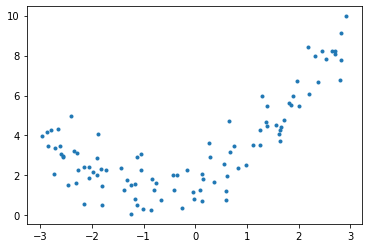

In [28]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, '.')

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [30]:
lin_reg.intercept_, lin_reg.coef_

(array([3.56401543]), array([[0.84362064]]))

In [ ]:
# 모델 = 예측기(or 분류기)생성()
# 모델.fit(X, y) # 학습
# 모델.predict(X) # 예측

# 변환기 = 변환기객체생성()
# 변환기.fit() # 변환할 준비
# 변환기.transform(X) # 실제 변환

In [61]:
# 원본 특성에 제곱항을 추가
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [62]:
X[0]

array([-0.75275929])

In [63]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [51]:
(-0.75275929)**2

0.566646548681304

In [64]:
poly_features.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x0^2']

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [66]:
lin_reg.intercept_, lin_reg.coef_  # 0.5X**2 + X + 2

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [ ]:
np.linspace(-3, 3, 100)

In [68]:
X.shape

(100, 1)

(100, 2) (100, 2)


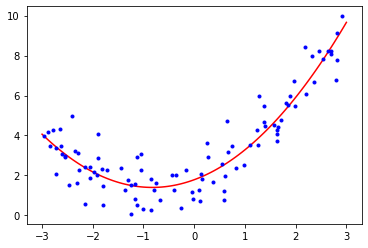

In [77]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

# X가 전처리(제곱항 특성이 추가)된 부분이 새 데이터에도 반영이 되어야 함
y_pred = lin_reg.predict(X_new_poly)
print(X_poly.shape, X_new_poly.shape)

plt.plot(X_new, y_pred, 'r-') # 새로운 데이터(X_new)에 대한 예측
plt.plot(X, y, 'b.') # 데이터 샘플

## 4. 규제 모델

### 4.1 릿지 회귀 - L2 규제

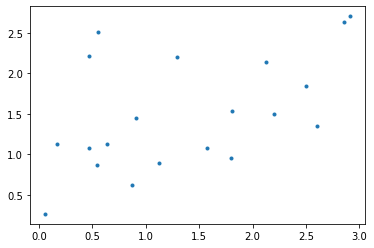

In [79]:
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 0.5 * X + 1 + np.random.randn(m, 1)/1.5
plt.plot(X, y, '.')

In [80]:
# 선형회귀 모델
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [81]:
lin_reg.intercept_, lin_reg.coef_ # y = 0.5X + 1

(array([0.97573667]), array([[0.3852145]]))

In [82]:
# 릿지회귀 모델 (L2 규제) - 해석적으로 해를 구함

from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X, y)

Ridge()

In [83]:
ridge_reg.intercept_, ridge_reg.coef_ # 절편(theta 0)는 규제의 범위에 포함되지 않음

(array([1.00650911]), array([[0.36280369]]))

In [89]:
# 릿지회귀 모델 (L2 규제) - 경사하강법으로 해를 구함

# 규제없이
sgd_reg = SGDRegressor(penalty=None, random_state=42)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)


# 규제추가
sgd_reg_l2 = SGDRegressor(penalty='l2', alpha=0.1, random_state=42)
sgd_reg_l2.fit(X, y.ravel())
print(sgd_reg_l2.intercept_, sgd_reg_l2.coef_)

[0.53945658] [0.62046175]
[0.57901244] [0.58606577]


### 4.2 라쏘 회귀 - L1 규제

In [88]:
# 라쏘 회귀 모델(L1 규제) - 해석적으로 해를 구함
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X, y)
lasso_reg.intercept_, lasso_reg.coef_


(array([1.14537356]), array([0.26167212]))

In [26]:
# 라쏘 회귀 모델(L1 규제) - 경사하강법으로 해를 구함

In [90]:
# 규제없이
sgd_reg = SGDRegressor(penalty=None, random_state=42)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)


# 규제추가
sgd_reg_l1 = SGDRegressor(penalty='l1', alpha=0.1, random_state=42)
sgd_reg_l1.fit(X, y.ravel())
print(sgd_reg_l1.intercept_, sgd_reg_l1.coef_)

[0.53945658] [0.62046175]
[0.64450934] [0.54050476]


### 4.3  엘라스틱넷

In [92]:
# 엘라스틱넷 (l1 규제, l2 규제 함께 )
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_reg.fit(X, y)
elastic_reg.intercept_, elastic_reg.coef_


(array([1.08639303]), array([0.30462619]))

In [93]:
# 규제없이
sgd_reg = SGDRegressor(penalty=None, random_state=42)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)


# 규제추가
sgd_reg_l1l2 = SGDRegressor(penalty='elasticnet', alpha=0.1, random_state=42)
sgd_reg_l1l2.fit(X, y.ravel())
print(sgd_reg_l1l2.intercept_, sgd_reg_l1l2.coef_)

[0.53945658] [0.62046175]
[0.59684835] [0.57598861]
